## Project Objective:

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv, and 20 inputs.

#### What Is a Term Deposit?

- A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.
- Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
- Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.

#### Term Deposit Explained.

When an account holder deposits funds at a bank, the bank can use that money to lend to other consumers or businesses. In return for the right to use these funds for lending, they will pay the depositor compensation in the form of interest on the account balance. With most deposit accounts of this nature, the owner may withdraw their money at any time. This makes it difficult for the bank to know ahead of time how much they may lend at any given time.

To overcome this problem, banks offer term deposit accounts. A customer will deposit or invest in one of these accounts, agreeing not to withdraw their funds for a fixed period in return for a higher rate of interest paid on the account.

The interest earned on a term deposit account is slightly higher than that paid on standard savings or interest-bearing checking accounts. The increased rate is because access to the money is limited for the timeframe of the term deposit. Term deposits are an extremely safe investment and are therefore very appealing to conservative, low-risk investors. 

| Pros | Cons|
|------|-----|
|Term deposits offer a fixed rate of interest over the life of the investment.|Interest rates paid on term deposits are typically lower or less attractive than most fixed-rate investments.|
|Term deposits are risk-free, safe investments since they're either backed by the FDIC or the NCUA.|Term deposits can't be withdrawn early without penalty or losing all of the interest earned.|
|Various maturities allow investors to stagger end-dates to create an investment ladder.|Interest rates don't keep up with rising inflation.|
|Term deposits have a low minimum deposit amount.|Interest rate risk exists if investors are locked in a low-rate term deposit while overall interest rates are rising.|
|Term deposits pay higher rates for larger initial deposit amounts.|-|

## Input variables:

### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes:
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

#### WHO  =  BANK'S CUSTOMERS
#### WHAT  =  bank.columns
#### WHEN  =  BETWEEN MAY 08 AND NOV 10
#### WHERE  =  PORTUGAL
#### HOW  =  BANK'S TELEMARKETING RECORDS
#### WHY  =  PREDICT WHETHER CUSTOMERS WILL SUBSCRIBE TO TERM DEPOSIT OR NOT

In [1]:
import os
import matplotlib
matplotlib.use(u'nbAgg')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
## bank['y'] = bank['y'].map({'yes':1, 'no':0}).astype(int)
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## What is the distribution of numerical feature values across the samples?

- Total samples are 41188.
- Desired target y is a categorical feature with a binary system of yes:1 and no:0.
- y - Around 11.26% of the customers answered yes .
- age - Average age of the customers is around 40 where lowest is 17 and highest is 98.(include)
- campaign - Customers were contacted on average 2.5 times during this campaign with a few outliers where on customer was contacted a whopping 56 times.(outlier)(include)
- Pdays - More than 75% of the customers were not previously contacted for any kind of campaign at all!(analyze) (high correlation with previous!)
- previous - Very few customers were contacted before. (analyze and most likely delete)
- emp.var.rate - Can't make much of it right now but since it is a quarterly indicator I may be able to groupby with nr.employed column to look for any patterns. might also correlate very high with said column.
- cons.price.idx - Can't make much of it right now but since it is a monhtly indicator I may be able to groupby with cons.conf.idx column to look for any patterns. might also correlate very high with said column.
- euribor3m - (description:The 3 month Euribor interest rate is the interest rate at which a panel of banks lend money to one another with a maturity of 3 months) It is a daily indicator which might be useful for further analysis. 

In [4]:
bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## What is the distribution of categorical features?

- There are 12 job titles with most frequent being admin which occurs around 25% of the total sample.
- More than half the sample are married.
- More than 25% of the customers have university degree.
- Nearly 80% of the customers do not have credit in default. Might be due to the fact that the bank did not wanted to reach to its customers who have defaults.
- More than half of the customers have housing loans.
- Again more than 80% of the customers do not have personal loans. Might correlate highly with default.
- The bank reached its customers on their cellular phones more than 50% of the time. 
- The bank reached their customers most frequently on the month of may(33%). No communication on Jan of Feb.
- No communication between customers and the bank on weekends.
- 86% of the customers have not been reached for previous campaigns. High correlation with pdays and previous.

In [5]:
categorical = [col for col in bank.columns if bank[col].dtype == 'object']
numerical = [col for col in bank.columns if bank[col].dtype in ['int64', 'float64', 'int32']]

In [6]:
def categorical_countplot(data, hue=None):
    categorical = [col for col in data.columns if data[col].dtype == 'object']
    fig = plt.figure(figsize=(15,len(categorical)*8))
    for i,col in enumerate(categorical):
            ax = fig.add_subplot(len(categorical),1,i+1)
            Y = data[col]
            total = len(Y)*1.
            ax=sns.countplot(x=col, data=data, hue=hue)
            for p in ax.patches:
                ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+p.get_width()/3, p.get_height()+8))

            #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
            ax.yaxis.set_ticks(np.linspace(0, total, 11))
            #adjust the ticklabel to the desired format, without changing the position of the ticks.
            ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            # ax.legend(labels=["no","yes"])
    plt.show()


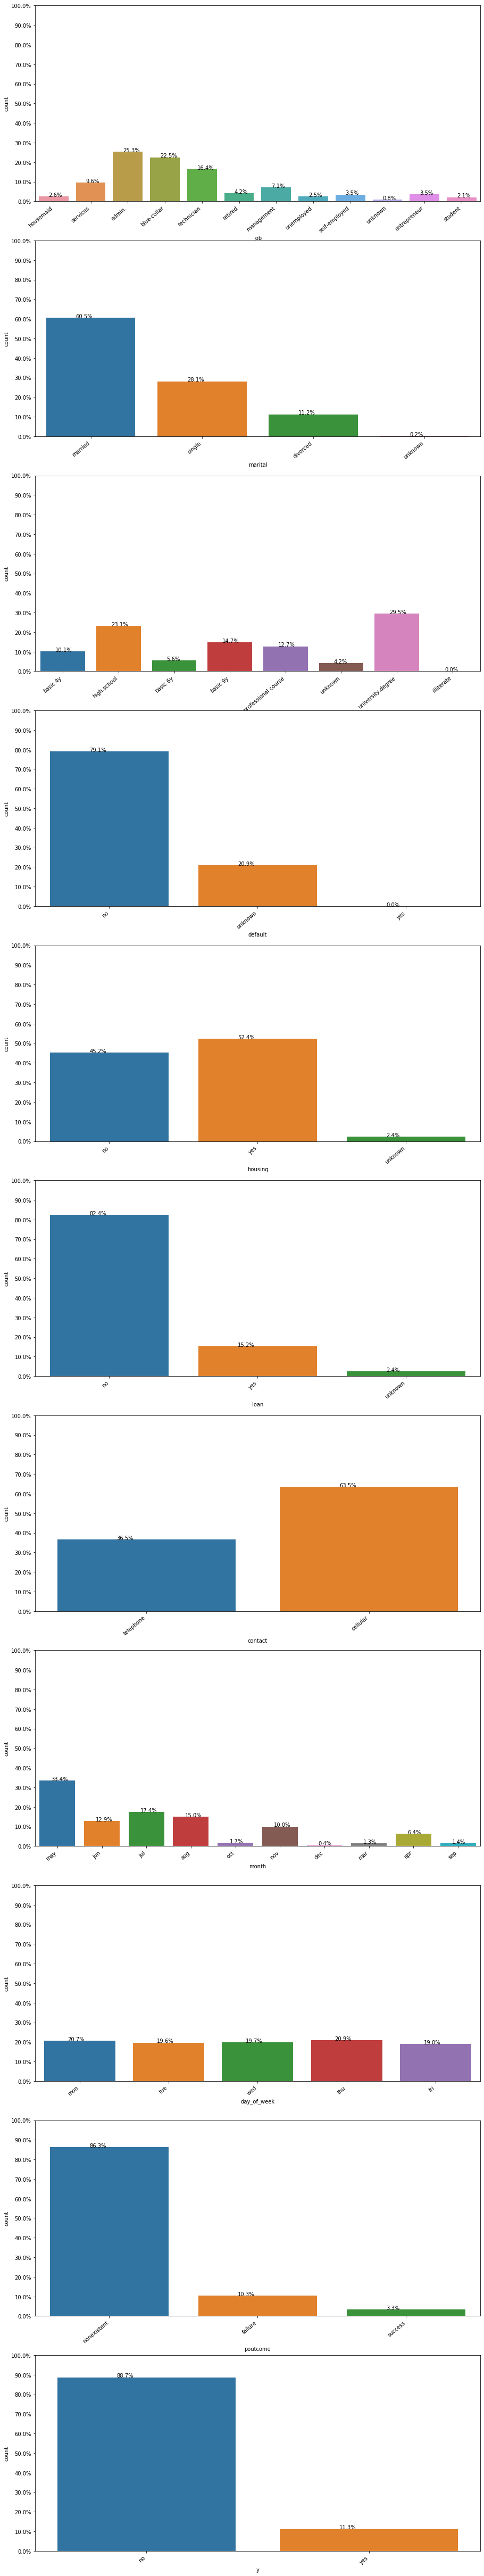

In [7]:
categorical_countplot(bank)

categorical_countplot(bank, hue='y')

In [9]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

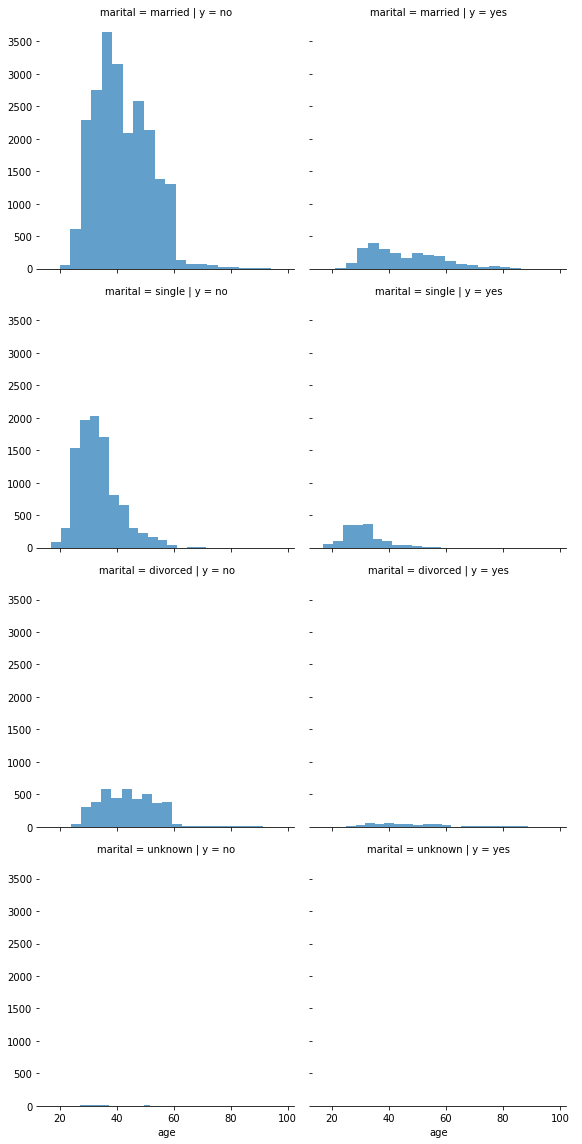

In [10]:
g = sns.FacetGrid(bank, col="y", row="marital", hue=None, height=4)
g.map(plt.hist, 'age', alpha=.7, bins=20)
g.add_legend()
sns.despine(left=True)
plt.show()

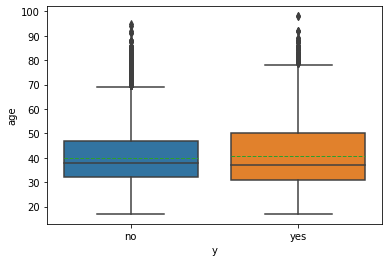

In [11]:
sns.boxplot(data=bank, x='y', y='age',showmeans=True, meanline=True)

In [12]:
bank[bank["y"] == 'yes']["pdays"].value_counts(normalize=True, ascending=False)*100

999    79.159483
3       6.422414
6       6.228448
4       1.357759
7       0.862069
2       0.797414
9       0.754310
10      0.646552
5       0.625000
13      0.603448
12      0.560345
15      0.344828
11      0.323276
8       0.258621
14      0.237069
0       0.215517
1       0.172414
16      0.129310
18      0.086207
21      0.043103
22      0.043103
17      0.043103
26      0.021552
25      0.021552
27      0.021552
19      0.021552
Name: pdays, dtype: float64

In [13]:
bank[bank["y"] == 'no']["pdays"].value_counts(normalize=True, ascending=False)*100

999    98.500602
3       0.385794
6       0.336544
4       0.150487
12      0.087556
9       0.079348
2       0.065667
10      0.060195
7       0.054723
1       0.049250
5       0.046514
11      0.035570
14      0.024625
15      0.021889
13      0.021889
17      0.016417
8       0.016417
0       0.013681
16      0.013681
18      0.008208
19      0.005472
20      0.002736
22      0.002736
Name: pdays, dtype: float64

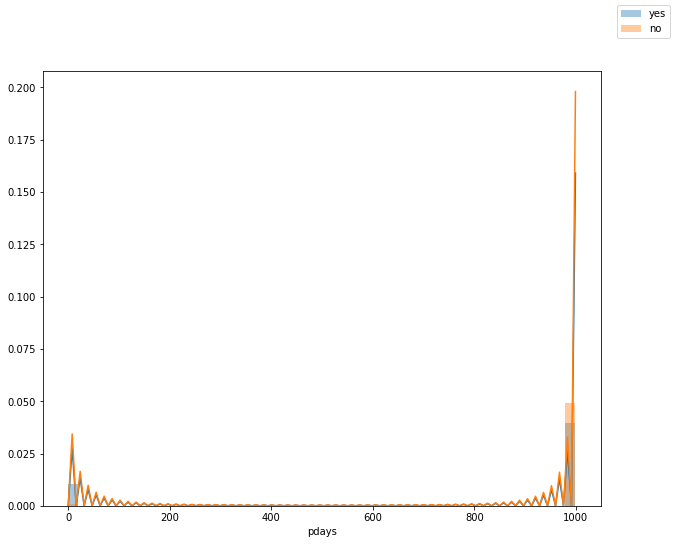

In [14]:
fig = plt.figure(figsize=(10,8))
sns.distplot(bank[bank["y"] == 'yes' ]["pdays"], kde_kws={'bw':0.1})
sns.distplot(bank[bank["y"] == 'no' ]["pdays"], kde_kws={'bw':0.1})
fig.legend(labels=['yes','no'])
plt.show()

In [15]:
bank[bank["y"] == 'yes']["previous"].value_counts(normalize=True, ascending=False)*100

0    67.693966
1    20.840517
2     7.543103
3     2.758621
4     0.818966
5     0.280172
6     0.064655
Name: previous, dtype: float64

In [16]:
bank[bank["y"] == 'no']["previous"].value_counts(normalize=True, ascending=False)*100

0    88.710737
1     9.833643
2     1.105396
3     0.240779
4     0.087556
5     0.013681
6     0.005472
7     0.002736
Name: previous, dtype: float64

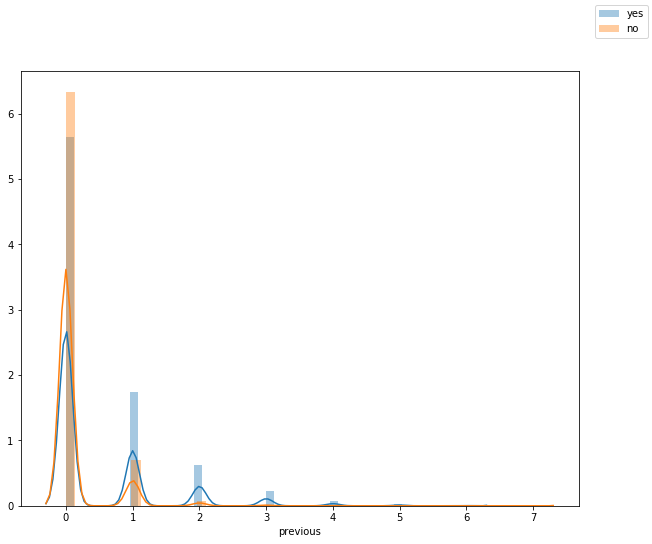

In [17]:
fig = plt.figure(figsize=(10,8))
sns.distplot(bank[bank["y"] == 'yes' ]["previous"], kde_kws={'bw':0.1})
sns.distplot(bank[bank["y"] == 'no' ]["previous"], kde_kws={'bw':0.1})
fig.legend(labels=['yes','no'])
plt.show()

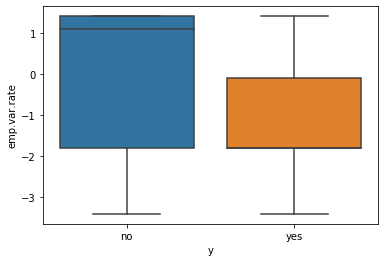

In [18]:
sns.boxplot(data=bank, x="y", y="emp.var.rate")
plt.show()

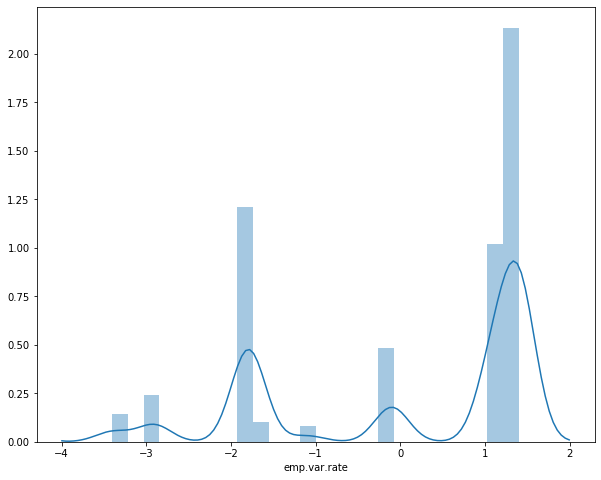

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(bank["emp.var.rate"])
plt.show()

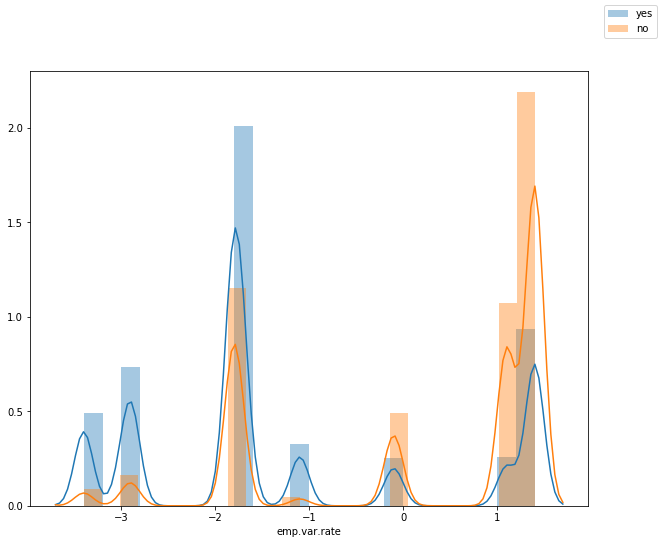

In [20]:
fig = plt.figure(figsize=(10,8))
sns.distplot(bank[bank["y"] == 'yes' ]["emp.var.rate"], kde_kws={'bw':0.1})
sns.distplot(bank[bank["y"] == 'no' ]["emp.var.rate"], kde_kws={'bw':0.1})
fig.legend(labels=['yes','no'])
plt.show()

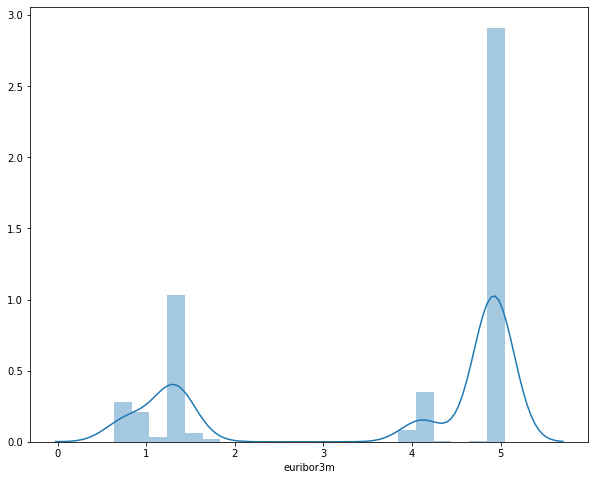

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(bank["euribor3m"])
plt.show()

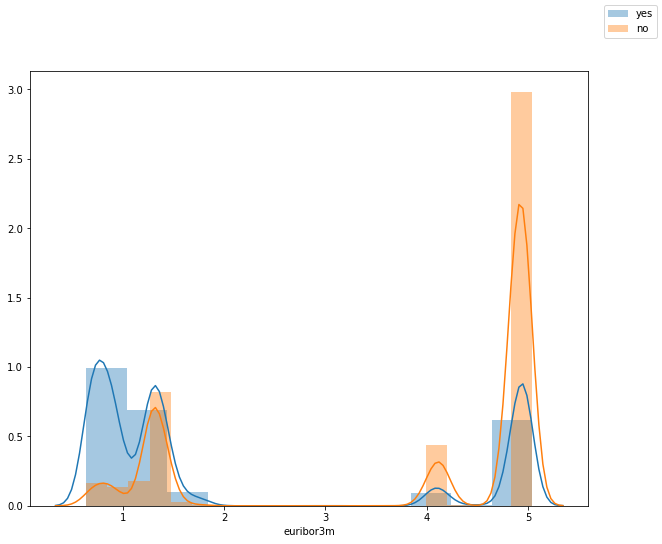

In [22]:
fig = plt.figure(figsize=(10,8))
sns.distplot(bank[bank["y"] == 'yes' ]["euribor3m"], kde_kws={'bw':0.1})
sns.distplot(bank[bank["y"] == 'no' ]["euribor3m"], kde_kws={'bw':0.1})
fig.legend(labels=['yes','no'])
plt.show()

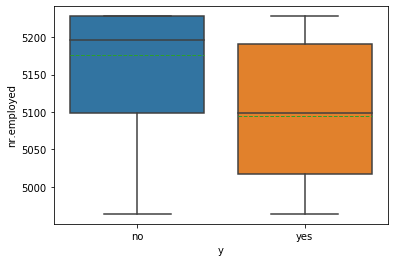

In [23]:
sns.boxplot(data=bank, x="y", y="nr.employed",showmeans=True, meanline=True)
plt.show()

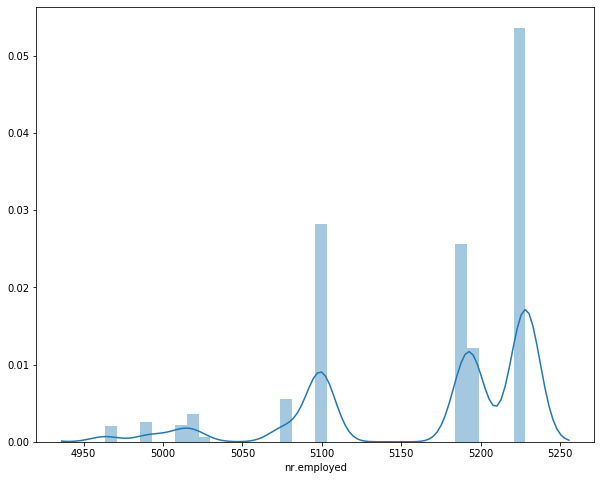

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(bank["nr.employed"])
plt.show()

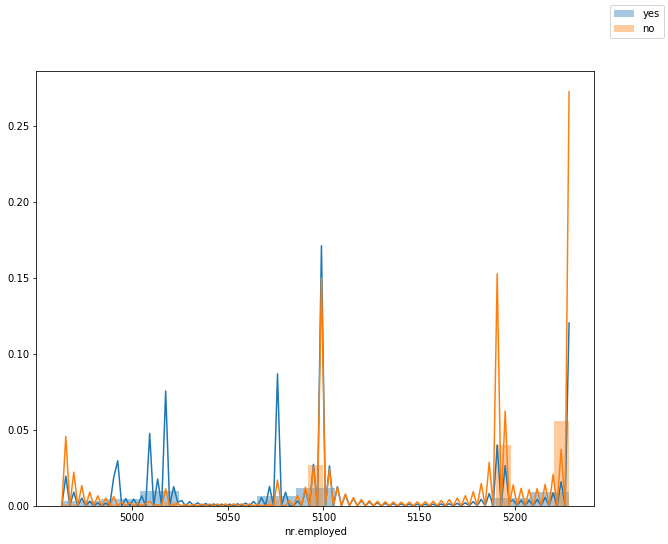

In [25]:
fig = plt.figure(figsize=(10,8))
sns.distplot(bank[bank["y"] == 'yes' ]["nr.employed"], kde_kws={'bw':0.1})
sns.distplot(bank[bank["y"] == 'no' ]["nr.employed"], kde_kws={'bw':0.1})
fig.legend(labels=['yes','no'])
plt.show()

In [26]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
d = {'column_name':  [col for col in bank.columns],
        'number_of_unique_values': [bank[col].nunique() for col in bank.columns],
    'most_occuring': [bank[col].value_counts(normalize=True, ascending=False).index[0] for col in bank.columns],
    'percentage': [round(bank[col].value_counts(normalize=True, ascending=False).to_list()[0]*100, 2) for col in bank.columns]}
ft = pd.DataFrame (d, columns = ['column_name','number_of_unique_values', 'most_occuring', 'percentage'])
ft.sort_values(by='percentage', axis=0, ascending=False, inplace=True, ignore_index=True) 
ft 

,column_name,number_of_unique_values,most_occuring,percentage
0,pdays,27,999,96.32
1,y,2,no,88.73
2,previous,8,0,86.34
3,poutcome,3,nonexistent,86.34
4,loan,3,no,82.43
5,default,3,no,79.12
6,contact,2,cellular,63.47
7,marital,4,married,60.52
8,housing,3,yes,52.38
9,campaign,42,1,42.83


### Takeaways:
 - The data is imbalanced. 88.73% of the customers said no.
 - The column pdays can be removed as 99.32% of it is the same value(999). 

In [28]:
bank.shape

(41188, 21)

In [29]:
duplicates = bank[bank.duplicated(keep="last")]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [30]:
bank = bank.drop_duplicates()
bank.shape

(41176, 21)

In [31]:
months = bank.month.unique()

for col in months:
    print(col)
    print(bank[bank['month'] == col]['nr.employed'].head(1))
for col in months:    
    print(col)
    print(bank.iloc[37887:][bank['month'] == col]['nr.employed'].head(1))

may
0    5191.0
Name: nr.employed, dtype: float64
jun
7763    5228.1
Name: nr.employed, dtype: float64
jul
12137    5228.1
Name: nr.employed, dtype: float64
aug
18822    5228.1
Name: nr.employed, dtype: float64
oct
23997    5195.8
Name: nr.employed, dtype: float64
nov
24064    5195.8
Name: nr.employed, dtype: float64
dec
27680    5176.3
Name: nr.employed, dtype: float64
mar
27690    5099.1
Name: nr.employed, dtype: float64
apr
27972    5099.1
Name: nr.employed, dtype: float64
sep
37887    5017.5
Name: nr.employed, dtype: float64
may
39568    5008.7
Name: nr.employed, dtype: float64
jun
39780    4991.6
Name: nr.employed, dtype: float64
jul
40009    4991.6
Name: nr.employed, dtype: float64
aug
40320    4991.6
Name: nr.employed, dtype: float64
oct
38154    5017.5
Name: nr.employed, dtype: float64
nov
38601    5017.5
Name: nr.employed, dtype: float64
dec
38958    5023.5
Name: nr.employed, dtype: float64
mar
39130    5008.7
Name: nr.employed, dtype: float64
apr
39394    5008.7
Name: nr.empl

C:\Users\conq_\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Number and the order of the months indicate that the dataset is not actually ranging from may-2008 to nov-2010. Since I cannot figure out which month belongs to which year, I have decided to disregard it from modelling. Instead of using the month-year order to do train-test splitting, I will use sklearn split and randomly split the data to decrease the chance of the month feature to have any kind of negative efffect on the model.

In [32]:
y = bank.y
X = bank

In [33]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=9, train_size = 0.8, test_size=0.2)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)
combined = [train_X, test_X]
train_X.head()

(32940, 21) (8236, 21) (32940,) (8236,)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37959,63,management,married,unknown,no,yes,no,cellular,sep,fri,156,2,999,2,failure,-3.4,92.379,-29.8,0.803,5017.5,no
35633,28,blue-collar,married,high.school,no,no,yes,telephone,may,mon,21,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
27759,34,technician,single,professional.course,no,no,no,cellular,mar,fri,229,1,999,0,nonexistent,-1.8,92.843,-50.0,1.726,5099.1,yes
29145,34,blue-collar,married,basic.9y,no,yes,no,cellular,apr,fri,157,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
27730,28,student,single,basic.9y,no,yes,no,cellular,mar,tue,156,1,999,0,nonexistent,-1.8,92.843,-50.0,1.799,5099.1,yes


In [34]:
for data in combined:
    data['y'] = data['y'].replace({'yes': 1, 'no': 0}).astype(int)

C:\Users\conq_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
train_X.age.describe()

count    32940.000000
mean        40.036217
std         10.411433
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

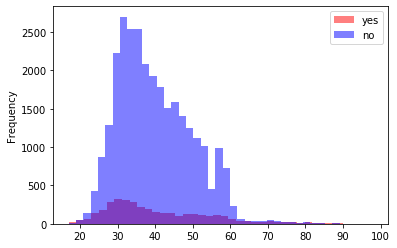

In [36]:
yes = train_X[train_X.y == 1]
no = train_X[train_X.y == 0]
yes.age.plot.hist(alpha=0.5, color='red', bins=40)
no.age.plot.hist(alpha=0.5, color = 'blue', bins=40)
plt.legend(['yes', 'no'])
plt.show()

In [37]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [38]:
cut_points = [16,30,40,50,60,100]
label_names = ["young","adult",'middle_age','late_career',"senior"]
train_X["age_category"] = pd.cut(train_X["age"],cut_points,labels=label_names)
test_X["age_category"] = pd.cut(test_X["age"],cut_points,labels=label_names)
combined = [train_X, test_X]

C:\Users\conq_\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\conq_\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
train_X = create_dummies(train_X, 'age_category')
test_X = create_dummies(test_X, 'age_category')
combined = [train_X, test_X]

In [40]:
train_X.drop(['age', 'age_category'], axis=1, inplace=True)
test_X.drop(['age', 'age_category'], axis=1, inplace=True)
combined = [train_X, test_X]
test_X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_category_young,age_category_adult,age_category_middle_age,age_category_late_career,age_category_senior
31921,blue-collar,married,basic.9y,unknown,yes,no,cellular,may,thu,580,3,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,0,1,0,0,0
19309,blue-collar,married,unknown,unknown,yes,no,cellular,aug,wed,376,2,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,0,0,0,0,1,0
38654,admin.,single,university.degree,no,yes,no,cellular,nov,tue,402,1,999,0,nonexistent,-3.4,92.649,-30.1,0.720,5017.5,0,1,0,0,0,0
10814,services,single,high.school,no,yes,no,telephone,jun,wed,205,3,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,0,1,0,0,0
21757,admin.,divorced,university.degree,unknown,yes,no,cellular,aug,tue,1200,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0


In [41]:
train_X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_category_young,age_category_adult,age_category_middle_age,age_category_late_career,age_category_senior
37959,management,married,unknown,no,yes,no,cellular,sep,fri,156,2,999,2,failure,-3.4,92.379,-29.8,0.803,5017.5,0,0,0,0,0,1
35633,blue-collar,married,high.school,no,no,yes,telephone,may,mon,21,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0,1,0,0,0,0
27759,technician,single,professional.course,no,no,no,cellular,mar,fri,229,1,999,0,nonexistent,-1.8,92.843,-50.0,1.726,5099.1,1,0,1,0,0,0
29145,blue-collar,married,basic.9y,no,yes,no,cellular,apr,fri,157,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0,0,0
27730,student,single,basic.9y,no,yes,no,cellular,mar,tue,156,1,999,0,nonexistent,-1.8,92.843,-50.0,1.799,5099.1,1,1,0,0,0,0


In [42]:
train_X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'age_category_young',
       'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior'],
      dtype='object')

In [43]:
categorical_cols =  [col for col in train_X.columns if train_X[col].dtype == 'object']
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [44]:
for col in categorical_cols:
    train_X = create_dummies(train_X, col)
    test_X = create_dummies(test_X, col)
combined = [train_X, test_X]
train_X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'age_category_young',
       'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housi

In [45]:
train_X.drop(categorical_cols, axis=1, inplace=True)
test_X.drop(categorical_cols, axis=1, inplace=True)
combined = [train_X, test_X]
train_X.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'age_category_young', 'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telep

In [46]:
train_X.drop('duration', axis=1, inplace=True)
test_X.drop('duration', axis=1, inplace=True)
combined = [train_X, test_X]
test_X.columns

Index(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_category_young',
       'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
     

In [47]:
remaining = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in remaining:
    print(col, '---', train_X[col].nunique())

campaign --- 42
pdays --- 26
previous --- 7
emp.var.rate --- 10
cons.price.idx --- 26
cons.conf.idx --- 26
euribor3m --- 315
nr.employed --- 11


In [48]:
## could calculate the inflation rate from CPI
train_X[remaining].head(20)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37959,2,999,2,-3.4,92.379,-29.8,0.803,5017.5
35633,2,999,0,-1.8,92.893,-46.2,1.244,5099.1
27759,1,999,0,-1.8,92.843,-50.0,1.726,5099.1
29145,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
27730,1,999,0,-1.8,92.843,-50.0,1.799,5099.1
39593,1,999,2,-1.8,93.876,-40.0,0.672,5008.7
22420,1,999,0,1.4,93.444,-36.1,4.964,5228.1
35788,4,999,0,-1.8,92.893,-46.2,1.244,5099.1
13806,15,999,0,1.4,93.918,-42.7,4.963,5228.1
5964,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [49]:
train_X[['cons.price.idx', 'y']].groupby(['cons.price.idx'], as_index=False).mean().sort_values('y', ascending=False)

,cons.price.idx,y
15,93.798,0.660000
12,93.369,0.604762
16,93.876,0.560694
22,94.215,0.552301
14,93.749,0.541667
5,92.713,0.540741
21,94.199,0.493827
19,94.027,0.491620
4,92.649,0.474265
20,94.055,0.461957


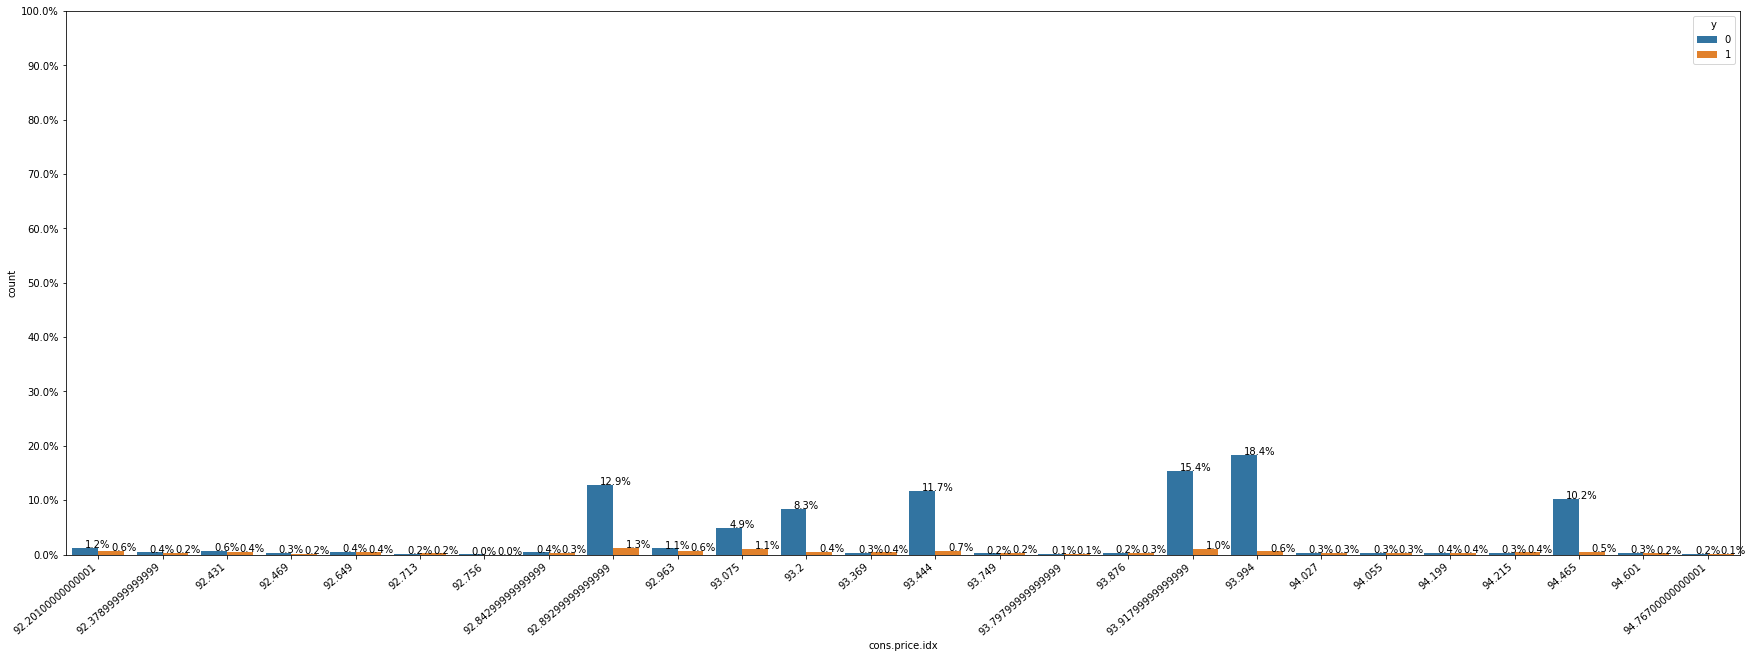

In [50]:
def countplot_withY(label, dataset):
    plt.figure(figsize=(30,10))
    Y = dataset[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+p.get_width()/2., p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    plt.show()
countplot_withY('cons.price.idx', train_X)

In [51]:
train_X[['cons.conf.idx', 'y']].groupby(['cons.conf.idx'], as_index=False).mean().sort_values('y', ascending=False)

,cons.conf.idx,y
10,-40.4,0.660000
18,-34.8,0.604762
12,-40.0,0.560694
11,-40.3,0.552301
19,-34.6,0.541667
21,-33.0,0.540741
15,-37.5,0.493827
14,-38.3,0.491620
23,-30.1,0.474265
13,-39.8,0.461957


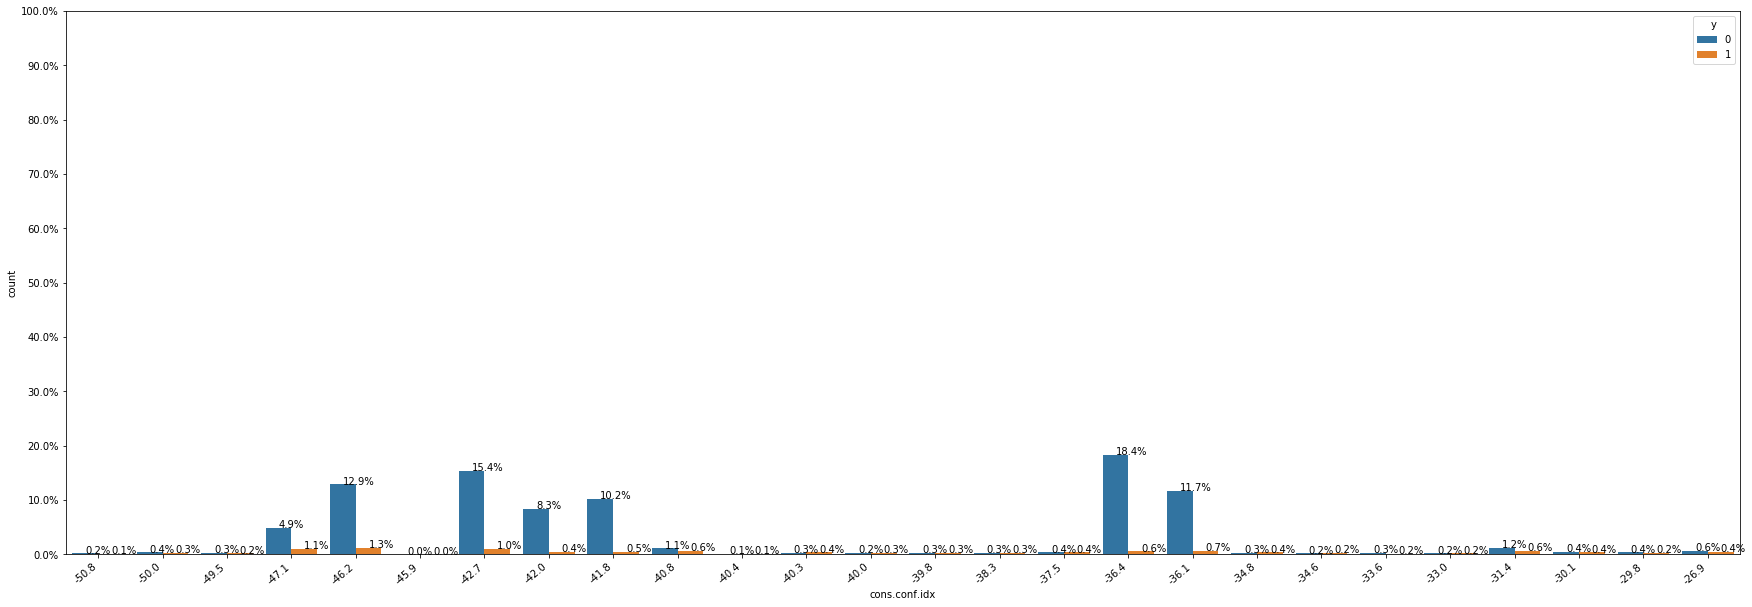

In [52]:
countplot_withY('cons.conf.idx', train_X)

In [53]:
train_X[['previous', 'y']].groupby(['previous'], as_index=False).mean().sort_values('y', ascending=False)

,previous,y
5,5,0.750000
6,6,0.750000
3,3,0.604520
4,4,0.490196
2,2,0.462687
1,1,0.207192
0,0,0.087471


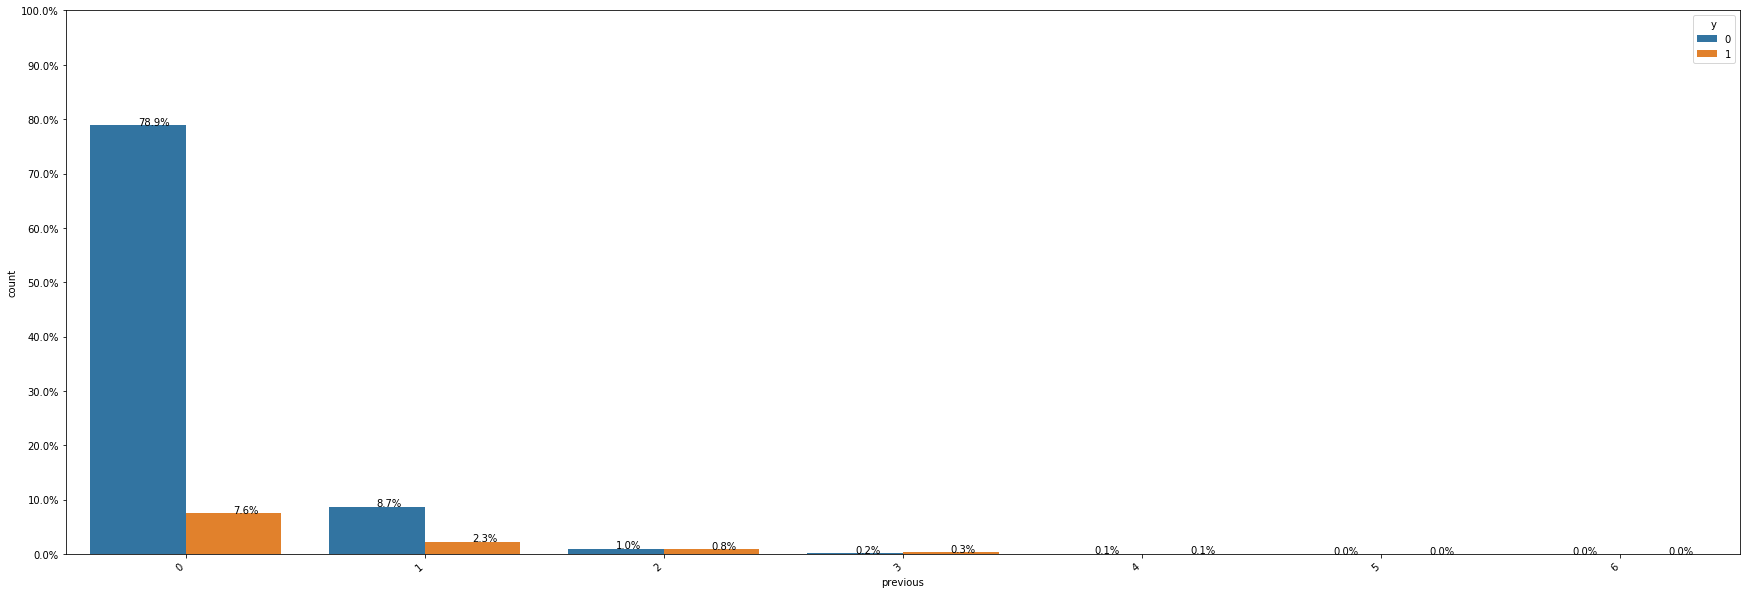

In [54]:
countplot_withY('previous', train_X)

In [55]:
train_X[['emp.var.rate','nr.employed', 'y']].groupby(['emp.var.rate'], as_index=False).mean().sort_values('y', ascending=False)

,emp.var.rate,nr.employed,y
1,-3.0,5023.500000,0.540741
4,-1.7,4991.600000,0.506645
5,-1.1,4963.600000,0.464286
0,-3.4,5017.500000,0.418465
2,-2.9,5076.200000,0.353429
3,-1.8,5092.639354,0.159615
6,-0.2,5176.300000,0.111111
7,-0.1,5195.800000,0.060225
9,1.4,5228.100000,0.053037
8,1.1,5191.000000,0.030429


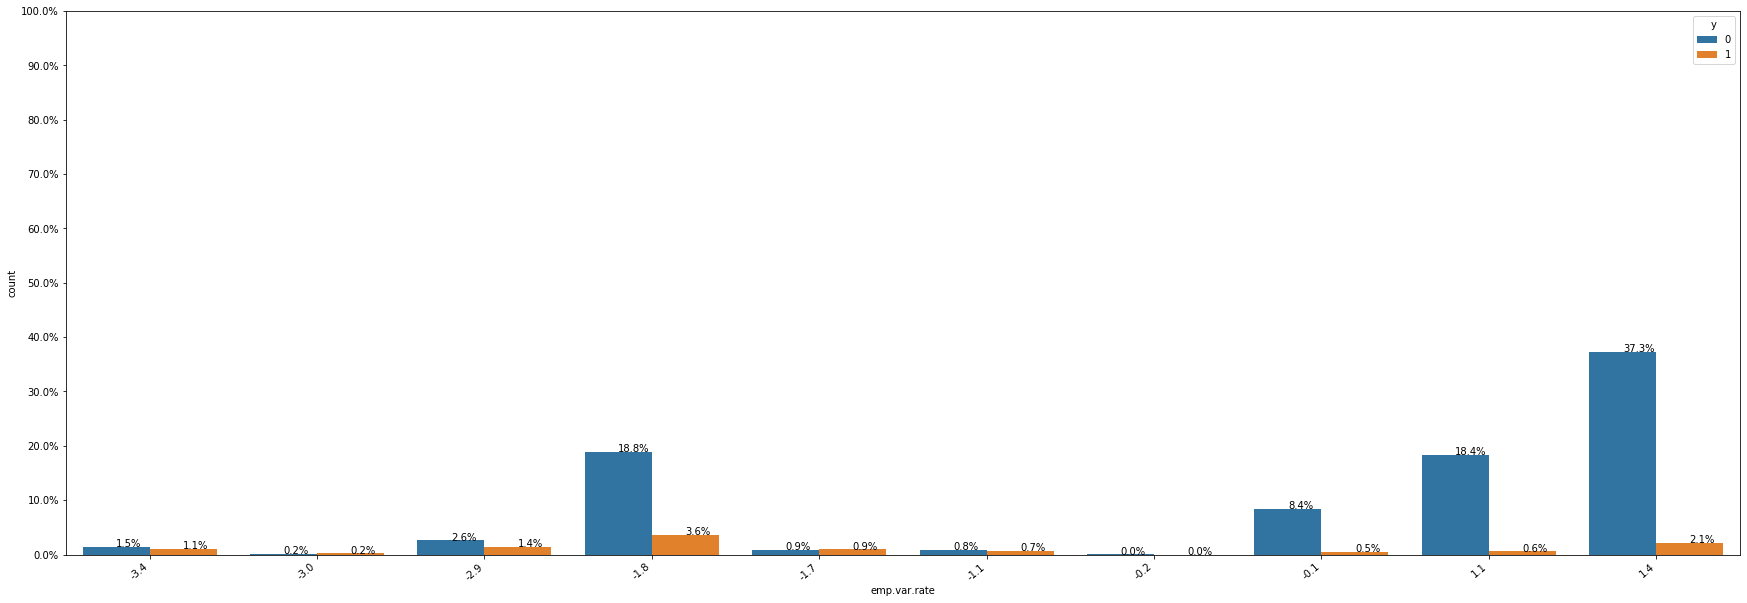

In [56]:
countplot_withY('emp.var.rate', train_X)

In [57]:
train_X[['nr.employed', 'y']].groupby(['nr.employed'], as_index=False).mean().sort_values('y', ascending=False)

,nr.employed,y
2,5008.7,0.573055
4,5023.5,0.540741
1,4991.6,0.506645
0,4963.6,0.464286
3,5017.5,0.418465
5,5076.2,0.353429
6,5099.1,0.127793
7,5176.3,0.111111
9,5195.8,0.060225
10,5228.1,0.053037


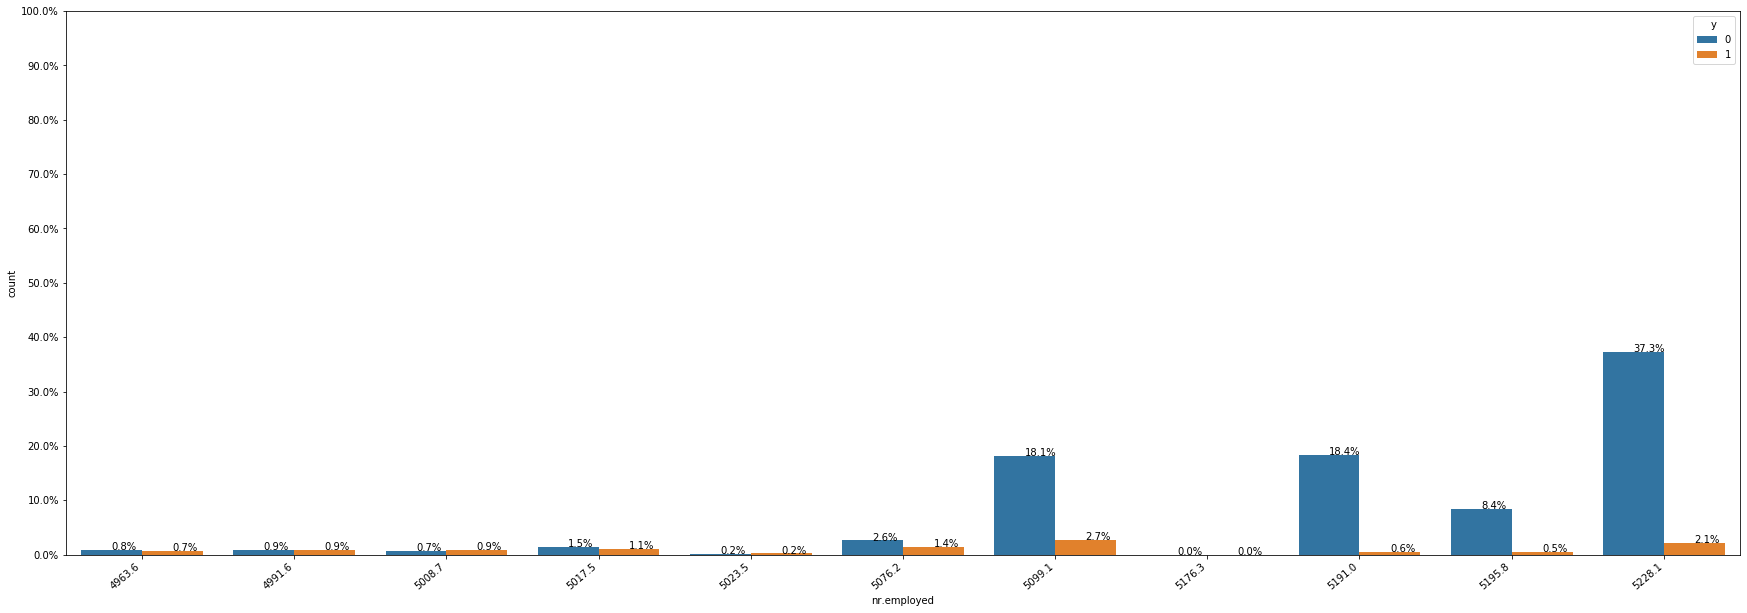

In [58]:
countplot_withY('nr.employed', train_X)

# CHECK THE INDICATORS(QUARTERLY,MONTHLY) AND MATCH THEM WITH THEIR RESPECTIVE MONTHS TO SEE IF YOU CAN FIND A PATTERN!!!!

## YOU WILL MOST LIKELY WILL NOT FIND ANY PATTERNS BUT IF THATS THE CASE THEN JUST APPLY MINMAX AND THEN START MODELLING!!!

In [59]:
train_X.pdays.value_counts()

999    31760
3        349
6        316
4         85
9         52
2         49
7         47
12        47
10        44
5         38
13        26
11        24
1         20
15        19
8         14
14        14
0          9
16         7
17         5
18         5
19         3
22         3
25         1
20         1
21         1
26         1
Name: pdays, dtype: int64

In [60]:
train_X.pdays = train_X.pdays.replace(999,0)
test_X.pdays = test_X.pdays.replace(999,0)
combined = [train_X, test_X]
train_X.pdays.value_counts()

0     31769
3       349
6       316
4        85
9        52
2        49
7        47
12       47
10       44
5        38
13       26
11       24
1        20
15       19
8        14
14       14
16        7
18        5
17        5
19        3
22        3
20        1
21        1
25        1
26        1
Name: pdays, dtype: int64

In [61]:
cut_points = [-0.5,0.5,10,26]
label_names = ["not_contacted","contacted_in_last_ten",'contacted_in_last_25']
train_X["pdays"] = pd.cut(train_X["pdays"],cut_points,labels=label_names)
test_X["pdays"] = pd.cut(test_X["pdays"],cut_points,labels=label_names)
combined = [train_X, test_X]

In [62]:
train_X.pdays.value_counts()

not_contacted            31769
contacted_in_last_ten     1014
contacted_in_last_25       157
Name: pdays, dtype: int64

In [63]:
test_X.pdays.value_counts()

not_contacted            7907
contacted_in_last_ten     282
contacted_in_last_25       46
Name: pdays, dtype: int64

In [64]:
train_X = create_dummies(train_X, 'pdays')
test_X = create_dummies(test_X, 'pdays')
combined = [train_X, test_X]
train_X.drop(['pdays'], axis=1, inplace=True)
test_X.drop(['pdays'], axis=1, inplace=True)
combined = [train_X, test_X]
print(train_X.columns, test_X.columns)

Index(['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_category_young',
       'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_

In [65]:
train_X.campaign.describe()

count    32940.000000
mean         2.569611
std          2.760161
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [66]:
total_1 = len(train_X[(train_X.campaign == 1)])
total_2 = len(train_X[(train_X.campaign == 2)])
total_3 = len(train_X[(train_X.campaign == 3)])
total_3_more = len(train_X[(train_X.campaign > 3)])
one_yes = round((len(train_X[(train_X.campaign == 1) & (train_X.y == 1)]) / total_1)*100, 2)
two_yes = round((len(train_X[(train_X.campaign == 2) & (train_X.y == 1)]) / total_2)*100, 2)
three_yes = round((len(train_X[(train_X.campaign == 3) & (train_X.y == 1)]) / total_3)*100, 2)
more_than_three_yes = round((len(train_X[(train_X.campaign > 3) & (train_X.y == 1)]) / total_3_more)*100, 2)
print('Ratio"(%)"" of the clients that was contacted during this campaign and said yes:', '\n', 'one: ', one_yes, '\n', 'two: ', two_yes, '\n', 'three: ', three_yes, '\n', 'More than 3: ', more_than_three_yes)

Ratio"(%)"" of the clients that was contacted during this campaign and said yes: 
 one:  12.87 
 two:  11.42 
 three:  10.52 
 More than 3:  7.12


In [67]:
cut_points = [-0.5,1.5,2.5,3.5,57]
label_names = ["one","two",'three','more_than_three']
train_X["campaign"] = pd.cut(train_X["campaign"],cut_points,labels=label_names)
test_X["campaign"] = pd.cut(test_X["campaign"],cut_points,labels=label_names)
combined = [train_X, test_X]
test_X.columns

Index(['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_category_young',
       'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_

In [68]:
train_X.campaign.describe()

count     32940
unique        4
top         one
freq      14097
Name: campaign, dtype: object

In [69]:
train_X = create_dummies(train_X, 'campaign')
test_X = create_dummies(test_X, 'campaign')
combined = [train_X, test_X]
train_X.drop(['campaign'], axis=1, inplace=True)
test_X.drop(['campaign'], axis=1, inplace=True)
combined = [train_X, test_X]
print(train_X.columns, test_X.columns)

Index(['previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'age_category_young',
       'age_category_adult', 'age_category_middle_age',
       'age_category_late_career', 'age_category_senior', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month

In [70]:
train_X.previous.value_counts()

0    28478
1     3615
2      603
3      177
4       51
5       12
6        4
Name: previous, dtype: int64

In [71]:
total_0 = len(train_X[(train_X.previous == 0)])
total_1 = len(train_X[(train_X.previous > 0)])
zero_yes = round((len(train_X[(train_X.previous == 0) & (train_X.y == 1)]) / total_0)*100, 2)
one_yes = round((len(train_X[(train_X.previous > 0) & (train_X.y == 1)]) / total_1)*100, 2)
print('Ratio"(%)"" of the clients that was contacted before this campaign and said yes to current campaign:', '\n', 'zero: ', zero_yes, '\n', 'one or more: ', one_yes)

Ratio"(%)"" of the clients that was contacted before this campaign and said yes to current campaign: 
 zero:  8.75 
 one or more:  26.27


In [72]:
cut_points = [-0.5,0.5,7]
label_names = ["zero","one_or_more"]
train_X["previous"] = pd.cut(train_X["previous"],cut_points,labels=label_names)
test_X["previous"] = pd.cut(test_X["previous"],cut_points,labels=label_names)
combined = [train_X, test_X]
test_X.head()

,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_category_young,age_category_adult,age_category_middle_age,age_category_late_career,age_category_senior,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_not_contacted,pdays_contacted_in_last_ten,pdays_contacted_in_last_25,campaign_one,campaign_two,campaign_three,campaign_more_than_three
31921,zero,-1.8,92.893,-46.2,1.327,5099.1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
19309,zero,1.4,93.444,-36.1,4.967,5228.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
38654,zero,-3.4,92.649,-30.1,0.720,5017.5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
10814,zero,1.4,94.465,-41.8,4.962,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
21757,zero,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0


In [73]:
train_X = create_dummies(train_X, 'previous')
test_X = create_dummies(test_X, 'previous')
combined = [train_X, test_X]
train_X.drop(['previous'], axis=1, inplace=True)
test_X.drop(['previous'], axis=1, inplace=True)
combined = [train_X, test_X]
print(train_X.columns, test_X.columns)

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'age_category_young', 'age_category_adult',
       'age_category_middle_age', 'age_category_late_career',
       'age_category_senior', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'mont

In [74]:
from sklearn.preprocessing import minmax_scale

cols_to_scale = train_X.columns
for col in cols_to_scale:
        train_X[col] = minmax_scale(train_X[col])
        test_X[col] = minmax_scale(test_X[col])

In [75]:
# from sklearn.preprocessing import minmax_scale
# cols_to_scale = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
#        'nr.employed']
# for col in cols_to_scale:
#     train_X[col + "_scaled"] = minmax_scale(train_X[col])
#     test_X[col + "_scaled"] = minmax_scale(test_X[col])
# combined = [train_X, test_X]
# print(train_X.head(), '\n', test_X.head())

In [76]:
# train_X.drop(cols_to_scale, axis=1, inplace=True)
# test_X.drop(cols_to_scale, axis=1, inplace=True)
# combined = [train_X, test_X]
# print(train_X.head(), '\n', test_X.head())

In [77]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 37959 to 20835
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   emp.var.rate                   32940 non-null  float64
 1   cons.price.idx                 32940 non-null  float64
 2   cons.conf.idx                  32940 non-null  float64
 3   euribor3m                      32940 non-null  float64
 4   nr.employed                    32940 non-null  float64
 5   y                              32940 non-null  float64
 6   age_category_young             32940 non-null  float64
 7   age_category_adult             32940 non-null  float64
 8   age_category_middle_age        32940 non-null  float64
 9   age_category_late_career       32940 non-null  float64
 10  age_category_senior            32940 non-null  float64
 11  job_admin.                     32940 non-null  float64
 12  job_blue-collar                32940 non-n

In [78]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 31921 to 6682
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   emp.var.rate                   8236 non-null   float64
 1   cons.price.idx                 8236 non-null   float64
 2   cons.conf.idx                  8236 non-null   float64
 3   euribor3m                      8236 non-null   float64
 4   nr.employed                    8236 non-null   float64
 5   y                              8236 non-null   float64
 6   age_category_young             8236 non-null   float64
 7   age_category_adult             8236 non-null   float64
 8   age_category_middle_age        8236 non-null   float64
 9   age_category_late_career       8236 non-null   float64
 10  age_category_senior            8236 non-null   float64
 11  job_admin.                     8236 non-null   float64
 12  job_blue-collar                8236 non-null

In [79]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(40, 15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

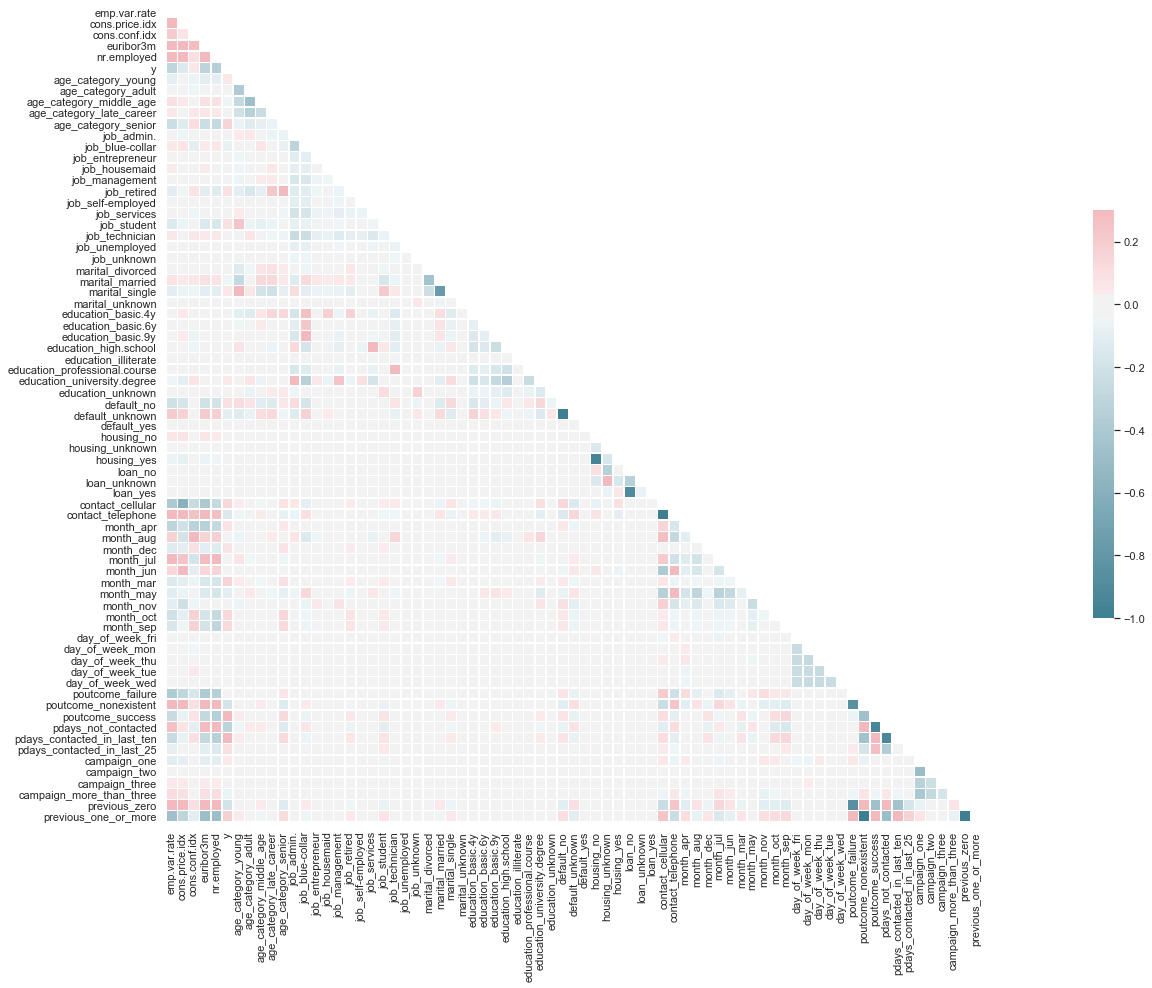

In [80]:
plot_correlation_heatmap(train_X)

In [81]:
for data in combined:
    data.drop('y', axis=1, inplace=True)
train_X.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_category_young,age_category_adult,age_category_middle_age,age_category_late_career,age_category_senior,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_not_contacted,pdays_contacted_in_last_ten,pdays_contacted_in_last_25,campaign_one,campaign_two,campaign_three,campaign_more_than_three,previous_zero,previous_one_or_more
37959,0.000000,0.069369,0.878661,0.038313,0.203781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35633,0.333333,0.269680,0.192469,0.138291,0.512287,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27759,0.333333,0.250195,0.033473,0.247563,0.512287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29145,0.333333,0.340608,0.154812,0.174790,0.512287,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27730,0.333333,0.250195,0.033473,0.264112,0.512287,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(train_X, train_y)

coefficients = lr.coef_

feature_importance = pd.Series(coefficients[0],
                               index=train_X.columns)
ordered_feature_importance = feature_importance.abs().sort_values()
selected_features = ordered_feature_importance[ordered_feature_importance > 0.15].index
selected_features

Index(['default_unknown', 'marital_married', 'month_sep', 'education_basic.4y',
       'marital_divorced', 'age_category_senior', 'campaign_more_than_three',
       'job_student', 'contact_cellular', 'pdays_contacted_in_last_25',
       'day_of_week_mon', 'month_jun', 'contact_telephone',
       'pdays_contacted_in_last_ten', 'marital_unknown', 'month_dec',
       'poutcome_success', 'nr.employed', 'poutcome_failure',
       'education_illiterate', 'cons.conf.idx', 'month_nov', 'month_may',
       'pdays_not_contacted', 'euribor3m', 'month_mar', 'cons.price.idx',
       'emp.var.rate'],
      dtype='object')

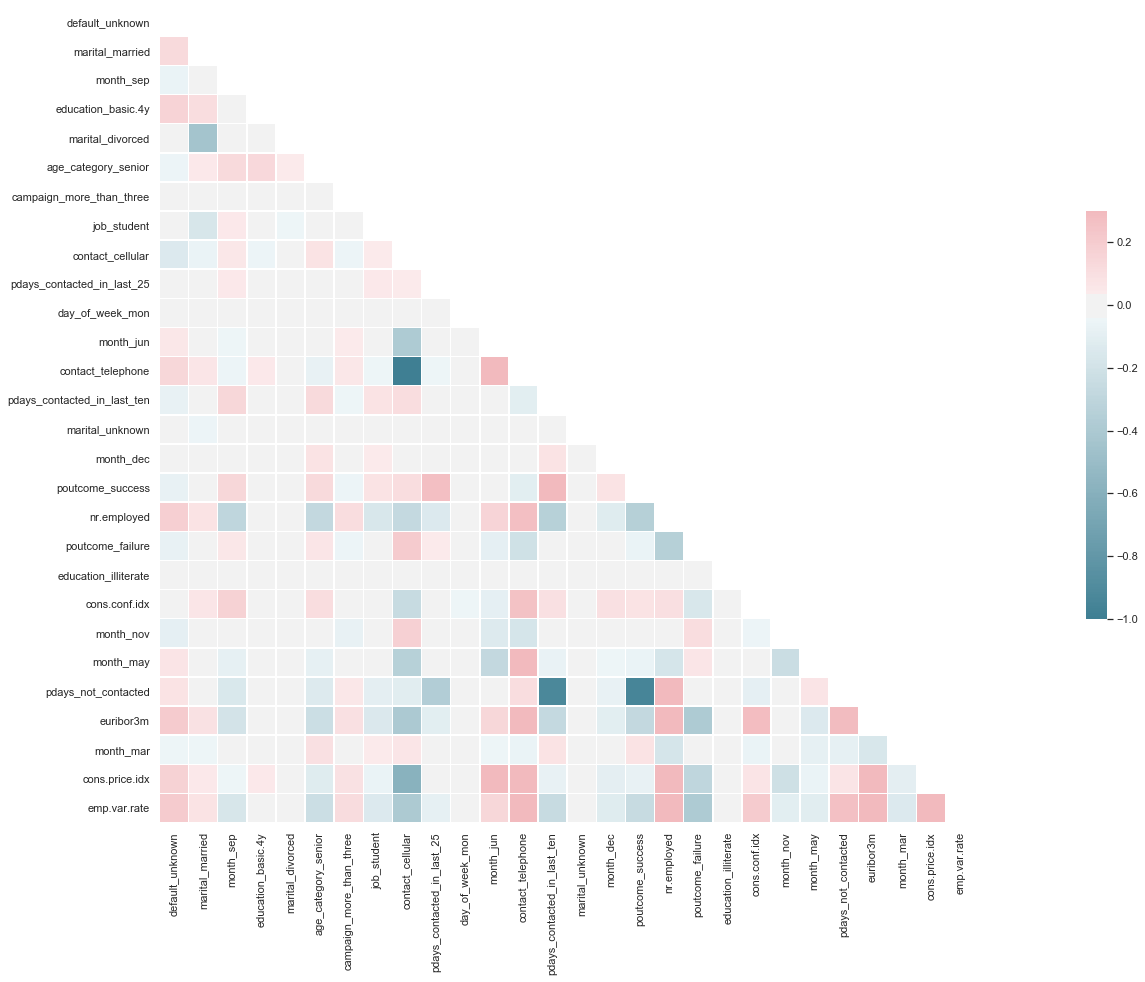

In [83]:
plot_correlation_heatmap(train_X[selected_features])

In [84]:
selected_features = ['default_unknown', 'marital_married', 'month_sep', 'education_basic.4y',
       'marital_divorced', 'age_category_senior', 'campaign_more_than_three',
       'job_student', 'contact_cellular', 'pdays_contacted_in_last_25',
       'day_of_week_mon', 'month_jun',
       'pdays_contacted_in_last_ten', 'marital_unknown', 'month_dec',
       'poutcome_success', 'nr.employed', 'poutcome_failure',
       'education_illiterate', 'cons.conf.idx', 'month_nov', 'month_may',
       'euribor3m', 'month_mar', 'cons.price.idx',
       'emp.var.rate']

In [85]:
from sklearn.metrics import roc_auc_score
# penalty = {'0:1','1:15'}
model = LogisticRegression(max_iter=250, class_weight='balanced')
model.fit(train_X[selected_features], train_y)
y_pred = model.predict_proba(test_X[selected_features])

print("AUC score: ", roc_auc_score(test_y, y_pred[:,1]))

AUC score:  0.7948817769724065


In [86]:
model = LogisticRegression(max_iter=250)
model.fit(train_X[selected_features], train_y)
y_pred = model.predict_proba(test_X[selected_features])

print("AUC score without class balancing: ", roc_auc_score(test_y, y_pred[:,1]))

AUC score without class balancing:  0.7942290594092941


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    all_X = df[features]
    all_y = train_y

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(max_iter=250),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                     }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
            {
                    "n_estimators": [15,50,100,150],
                    "max_depth": [2, 5, 10],
                    "min_samples_leaf": [1, 5, 8]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10, scoring='roc_auc')
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train_X,selected_features)

LogisticRegression
------------------
Best Score: 0.7920252337883869
Best Parameters: {'solver': 'liblinear'}

RandomForestClassifier
----------------------
Best Score: 0.800939363688293
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 8, 'n_estimators': 100}

